In [1]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import os
import glob
import tensorflow as tf
import numpy as np

In [3]:
layers = tf.keras.layers

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 12) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

import matplotlib.gridspec as gridspec


In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
from tqdm import tqdm

In [7]:
tf.enable_eager_execution()

In [8]:
x = np.random.normal(size=(16,42))
y = tf.multiply(x,x)
y.numpy()

array([[  7.05930683e-02,   2.89623126e-02,   8.95339273e-01,
          3.91208409e+00,   5.63257363e-01,   5.31238408e-02,
          1.04682108e-01,   4.68933890e+00,   9.91681666e-01,
          1.76013219e+00,   4.53074208e-02,   1.83497744e-01,
          1.13908838e-01,   1.97168619e-01,   6.01942552e-02,
          1.23760340e+00,   3.09492155e-01,   9.32256054e-02,
          2.60383230e-01,   3.10245303e-03,   1.49056522e+00,
          8.81076495e-01,   1.48184999e+00,   9.60744987e-03,
          9.56325775e-04,   1.14010893e+00,   2.45591088e-01,
          7.16497852e+00,   1.39982391e-02,   5.99074341e+00,
          1.76218932e+00,   5.34146024e-01,   1.01833114e+00,
          3.15336020e-01,   3.96246679e-01,   9.73732760e-02,
          3.12266776e-01,   8.85934046e-02,   4.07351220e-02,
          5.86417057e-01,   1.09458798e-01,   7.78231711e-01],
       [  3.74192282e-01,   7.17353420e-01,   1.11315686e+00,
          2.92961671e-01,   1.99774946e-01,   8.62838038e-02,
       

In [9]:
with tf.GradientTape() as tape:
    x = tf.random_normal(shape=(16,42))
    z = tf.get_variable('z',shape=(16,42), trainable=True)
    tape.watch(x)
    y = x * z
    grad = tape.gradient(y, z)

In [10]:
grad

<tf.Tensor: id=31, shape=(16, 42), dtype=float32, numpy=
array([[ -1.63066685e+00,  -1.49896353e-01,   1.30957723e+00,
          2.46199250e+00,   5.43422520e-01,  -3.80195469e-01,
          1.48968363e+00,   6.70911431e-01,  -1.40569639e+00,
         -7.85316765e-01,  -6.53514981e-01,  -2.02202845e+00,
          9.75675702e-01,   1.03015542e+00,   2.16681814e+00,
          3.61936867e-01,  -7.00191855e-02,   9.98919725e-01,
          1.63120002e-01,   5.23272455e-01,  -3.51605237e-01,
         -4.29421633e-01,  -1.30808282e+00,   6.44067407e-01,
          6.21783853e-01,   2.90263910e-02,  -3.06107134e-01,
          6.67053044e-01,   1.14798164e+00,  -1.77151263e+00,
          1.25127688e-01,   2.18520299e-01,   1.15176332e+00,
         -1.86986420e-02,   1.16170317e-01,  -3.31863910e-01,
         -4.90685195e-01,  -1.66443729e+00,   3.00937742e-02,
         -7.86506712e-01,   1.96145284e+00,  -3.29414129e-01],
       [  4.70889091e-01,   2.90003479e-01,   1.96714312e-01,
         -2.

In [11]:
def show_images(images):
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

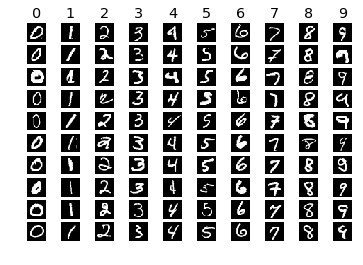

In [14]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [15]:
def build_discriminator():
    img_input = layers.Input(shape=(28, 28, 1))
    
    x = img_input
    
    x = layers.Conv2D(filters=32, kernel_size=(3,3), padding = 'same')(x)
    x = layers.ELU()(x)
    x = layers.MaxPool2D(pool_size=(2,2))(x)
    
    x = layers.Conv2D(filters=64, kernel_size=(3,3), padding = 'same')(x)
    x = layers.ELU()(x)    
    x = layers.MaxPool2D(pool_size=(2,2))(x)
    
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding = 'same')(x)    
    
    #Впишите код
    
    x = layers.Flatten()(x)
    x = layers.Dense(1)(x)
    
    return tf.keras.models.Model(img_input, x, 
                        name='discriminator')

In [16]:
discriminator = build_discriminator()

In [17]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
elu (ELU)                    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
elu_1 (ELU)                  (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [18]:
x_train = np.expand_dims(((x_train -127.5) / 127.5), -1).astype(np.float32)

In [19]:
discriminator(x_train[:32])

<tf.Tensor: id=160, shape=(32, 1), dtype=float32, numpy=
array([[ 0.06982361],
       [ 0.04566647],
       [-0.19885835],
       [-0.11617606],
       [-0.07690271],
       [-0.14870563],
       [-0.06305446],
       [-0.08630843],
       [-0.04078105],
       [-0.14039367],
       [-0.14238124],
       [-0.12666851],
       [-0.11323005],
       [-0.1368967 ],
       [-0.08426195],
       [-0.12847519],
       [-0.14566414],
       [-0.08167459],
       [-0.01628552],
       [-0.04842351],
       [-0.27071145],
       [-0.00367237],
       [-0.0630887 ],
       [-0.1401816 ],
       [-0.09225191],
       [-0.1037011 ],
       [-0.05653179],
       [-0.11486372],
       [-0.12598483],
       [-0.23070818],
       [-0.11510474],
       [-0.15745032]], dtype=float32)>

# А теперь генератор 

In [20]:
7*7*10

490

In [21]:
def build_generator():
    z_input = layers.Input(shape=(64,))
    
    #Впишите код
    
    x = z_input
    
    x = layers.Dense(7*7*128)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Reshape([7,7,128])(x)
    
    x = layers.Conv2D(filters=64, kernel_size=(3,3), padding = 'same')(x)
    x = layers.ELU()(x)
    x = layers.UpSampling2D()(x)
    print(x.shape)
    
    
    x = layers.Conv2D(filters=32, kernel_size=(3,3), padding = 'same')(x)
    x = layers.ELU()(x)
    x = layers.UpSampling2D()(x)
    print(x.shape)
    
#     x = layers.Conv2D(filters=64, kernel_size=(3,3), padding = 'same')(x)
#     x = layers.ELU()(x)    
#     x = layers.MaxPool2D(pool_size=(2,2))(x)
    
#     x = layers.Conv2D(filters=128, kernel_size=(3,3), padding = 'same')(x)  
    
    
    x = layers.Conv2D(1, (3, 3), padding='same', activation='tanh')(x)

    return tf.keras.models.Model(z_input, x)

In [22]:
generator = build_generator()

(?, 14, 14, 64)
(?, 28, 28, 32)


In [23]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6272)              407680    
_________________________________________________________________
batch_normalization (BatchNo (None, 6272)              25088     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          73792     
_________________________________________________________________
elu_2 (ELU)                  (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 64)        0         
__________

In [24]:
p = generator(np.random.normal(size=(1, 64)))

In [25]:
p.shape

TensorShape([Dimension(1), Dimension(28), Dimension(28), Dimension(1)])

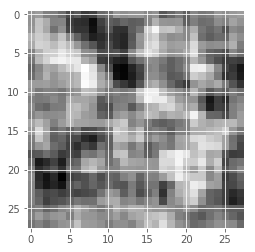

In [26]:
plt.imshow(p[0, :, :, 0])

# Зададим функции потерь

In [27]:
def get_generator_loss(noise_vector):
    fake_images = generator(noise_vector, training=True)
    score_fake = discriminator(fake_images, training=False)
    return -score_fake

In [28]:
get_generator_loss(np.random.normal(size=(1, 64)))

<tf.Tensor: id=457, shape=(1, 1), dtype=float32, numpy=array([[ 0.69314718]], dtype=float32)>

In [29]:
def get_disc_loss(real_images, noise_vector):
    fake_images = generator(noise_vector, training=False)
    score_fake = discriminator(fake_images, training=True)
    score_real = discriminator(real_images, training=True)
    
    wasserstein_score = score_fake-score_real
    
    
    with tf.GradientTape() as tape:
        alpha = tf.random_uniform((real_image))
    
    logits = tf.concat([logits_real, logits_fake], 0)
    labels = tf.concat([tf.ones(shape=logits_real.shape), tf.zeros(shape=logits_fake.shape)], 0)
    return tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=labels)

In [30]:
get_disc_loss(x_train[0:1], np.random.normal(size=(1,64)))

<tf.Tensor: id=585, shape=(2, 1), dtype=float32, numpy=
array([[ 0.65884471],
       [ 0.67355102]], dtype=float32)>

# Training loop


In [31]:
lr = 0.0001
lr_g = 0.0001

In [32]:
gen_otimizer = tf.train.AdamOptimizer(lr_g, beta1=0.5, beta2=0.999)
crit_optimizer = tf.train.AdamOptimizer(lr, beta1=0.5, beta2=0.999)

In [33]:
def apply_grads(optimizer, grads, variables):
    optimizer.apply_gradients(zip(grads, variables),
                            global_step=tf.train.get_or_create_global_step())

In [35]:
def train_your_gan(batch_size=16, epochs=20, critic_steps = 5):  ## количество шагов критика
    index = np.arange(len(x_train))

    #перемешиваем его
    np.random.shuffle(index)

    #разбиваем на батчи
    num_batches = int(len(index) / batch_size)
    batch_indexes = np.array_split(index, num_batches)

    print("num_batches: " + str(num_batches))
    
    for e in range(epochs):
        g_loss_history = []
        d_loss_history = []
        for i, batch_index in enumerate(batch_indexes):
            x_batch = x_train[batch_index]
            
            with tf.GradientTape() as tape:
                d_loss = get_disc_loss(x_batch, np.random.normal(size=(batch_size,64)))
                d_grads = tape.gradient(d_loss, discriminator.variables)
                apply_grads(crit_optimizer, d_grads, discriminator.variables)

            with tf.GradientTape() as tape:
                g_loss = get_generator_loss(np.random.normal(size=(batch_size, 64)))
                g_grads = tape.gradient(g_loss, generator.variables)
                apply_grads(gen_otimizer, g_grads, generator.variables)
            print(f'epoch {e}, batch {i} / {num_batches}', end='\r')
            g_loss_history.append(g_loss.numpy())
            d_loss_history.append(d_loss.numpy())

        print(f'epoch {e}, generator_loss: {np.mean(g_loss_history)}, critic_loss: {np.mean(d_loss_history)}')
        images = generator(np.random.normal(size=(batch_size, 64)))
        show_images(images)
        plt.show()

num_batches: 3750
epoch 0, generator_loss: 0.7837492227554321, critic_loss: 0.6380436420440674


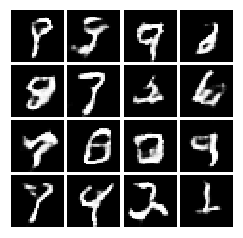

KeyboardInterrupt: 

In [106]:
train_your_gan()

num_batches: 3750
epoch 0, generator_loss: 2.0120341777801514, critic_loss: 0.29999446868896484


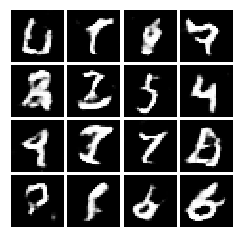

KeyboardInterrupt: 

In [124]:
train_your_gan()